# Big Data con Python

#### Rafael Caballero, Enrique Martín y Adrián Riesco. Editorial RC libros

## Capítulo 2:  ejemplo  de web scraping. Acceso a los datos del catastro


El propósito de este notebook es mostrar como hacer web scraping de datos de una página, en este ejemplo del catastro,  que nos exige introducir previamente datos e interaccionar, en este caso seleccionando pestañas y pulsando botones.

En particular utilizaremos la biblioteca *Selenium* que nos permite obtener automáticamente datos de páginas web dinámicas. Selenium está pensado realmente para automatizar pruebas de entornos web, pero a nosotros nos servirá para nuestro propósito de hacer web scraping.

En particular, lo que vamos a hacer es arrancar google Chrome y manejarlo automáticamente desde Python.



**Preparación**


Para ello necesitamos 3 cosas:

1.- Tener google Chrome

2.- Instalar la biblioteca selenium (pip install selenium)

3.- Tener un fichero controlador, un driver, de nombre *chromedriver.exe*.Esto lo vamos a hacer mediante la librería chromedriver_autoinstaller


#### Paso 1: abrir navegador
Comenzamos abriendo una sesión de Chrome de forma automática


**Importante**
Una vez que logremos que se abra el navegador no debemos teclear nada en él, ni cerrarlo el control lo llevaremos desde el programa en Python

In [1]:
modules = ["selenium","chromedriver_autoinstaller"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user",  m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules) 

Instalando módulos
selenium  encontrado
chromedriver_autoinstaller  encontrado
¡Terminado!


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless') # ensure GUI is off
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

### Paso 2: cargar página
Una vez abierto el navegador lo siguiente es cargar la página que deseemos, en este caso la del catastro. Debemos ver cómo se carga la página correspondiente

In [3]:
url = 'https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx'
driver.get(url)

Es cada vez más normal que al cargar la página tengamos que dar "Aceptar" para quitar el banner inicial sobre cookies

In [4]:
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
#aceptar las cookies

try:
    cookies = driver.find_element(By.LINK_TEXT, "Aceptar cookies")
    cookies.click()
    print("Cookies aceptadas.")
except Exception as e:
    print("No se encontró el botón de aceptar cookies o ocurrió un error:", e)


No se encontró el botón de aceptar cookies o ocurrió un error: Message: no such element: Unable to locate element: {"method":"link text","selector":"Aceptar cookies"}
  (Session info: chrome=126.0.6478.61); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00F90F03+27667]
	(No symbol) [0x00F26C04]
	(No symbol) [0x00E21AFF]
	(No symbol) [0x00E62BFE]
	(No symbol) [0x00E62CDB]
	(No symbol) [0x00E9EC22]
	(No symbol) [0x00E83974]
	(No symbol) [0x00E9CAC7]
	(No symbol) [0x00E836C6]
	(No symbol) [0x00E574D1]
	(No symbol) [0x00E5804D]
	GetHandleVerifier [0x01243D83+2857619]
	GetHandleVerifier [0x01297EED+3202045]
	GetHandleVerifier [0x01014704+566292]
	GetHandleVerifier [0x0101B8FC+595468]
	(No symbol) [0x00F2F9F4]
	(No symbol) [0x00F2C708]
	(No symbol) [0x00F2C8A7]
	(No symbol) [0x00F1E79E]
	BaseThreadInitThunk [0x7578FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x7

### Paso 3, interacción con la página

Ahora queremos seleccionar la pestaña coordenadas, ya que vamos a introducir las coordenadas de un lugar concreto. Esto se hace en dos fases: primero se selecciona el elemento y luego interaccionamos con él. En este caso comprobamos viendo el código fuente que la etiqueta COORDENADAS es un enlace, sobre el que deseamos hacer click


In [5]:
from selenium.webdriver.common.by import By
coord   = driver.find_element(By.LINK_TEXT,"COORDENADAS")
coord.click()

Ya en la pestaña, introducimos las coordenadas y hacemos click para buscar la información. En este ejemplo hemos puesto las coordenadas  long=1.893817, lat=41.545639, pero pueden ser otras cualesquiera

In [6]:
lat = driver.find_element(By.ID,"ctl00_Contenido_txtLatitud")
lon = driver.find_element(By.ID,"ctl00_Contenido_txtLongitud")
latitud  = "41.545639 "
longitud = "1.893817"
lat.send_keys(latitud)
lon.send_keys(longitud)

datos = driver.find_element(By.NAME, "ctl00$Contenido$btnDatos")
datos.click()


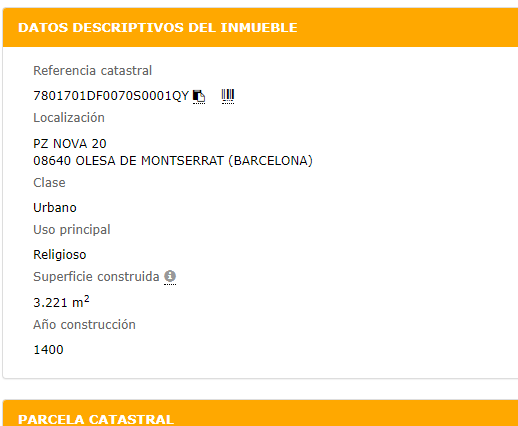

Ahora supongamos que queremos determinar el uso principal de este inmueble, para ellos buscamos 

In [21]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)
xpath = "//*[./span/text()='Uso principal']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    
Religioso


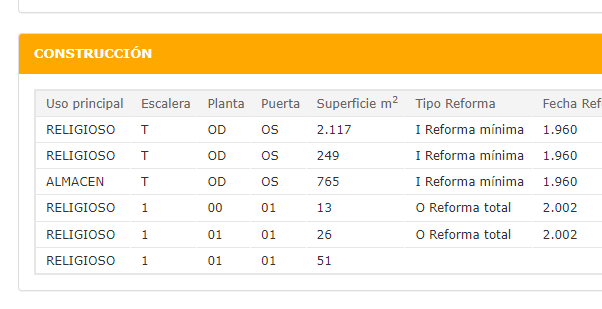

### Otras pruebas

Texto de la página

In [7]:
html = driver.find_element(By.XPATH,"/html")
print(html.text)

Formulario master
Castellano
ICONO CORREO ELECTRÓNICO
CONTÁCTENOS
Icono página de inicio
Consulta y certificación de Bien Inmueble
Volver
CARTOGRAFÍA
CONSULTA DESCRIPTIVA Y GRÁFICA
IMPRIMIR DATOS
VISOR 3D
DATOS DESCRIPTIVOS DEL INMUEBLE
Referencia catastral
7801701DF0070S0001QY    
Localización
PZ NOVA 20
08640 OLESA DE MONTSERRAT (BARCELONA)
Clase
Urbano
Uso principal
Religioso
Superficie construida
3.221 m2
Año construcción
1400
PARCELA CATASTRAL

Parcela construida sin división horizontal
Localización
PZ NOVA 20
OLESA DE MONTSERRAT (BARCELONA)
Superficie gráfica
1.884 m2
CONSTRUCCIÓN
Uso principal Escalera Planta Puerta Superficie m2 Tipo Reforma Fecha Reforma
RELIGIOSO T OD OS 2.117 I Reforma mínima 1.960
RELIGIOSO T OD OS 249 I Reforma mínima 1.960
ALMACEN T OD OS 765 I Reforma mínima 1.960
RELIGIOSO 1 00 01 13 O Reforma total 2.002
RELIGIOSO 1 01 01 26 O Reforma total 2.002
RELIGIOSO 1 01 01 51
¿Cómo se pueden obtener datos protegidos (titularidad y valor catastral) de los inmueb

Caminos absolutos

In [8]:
head = driver.find_element(By.XPATH,"/html/head")
body = driver.find_element(By.XPATH,"/html/body")
html2 = body.find_element(By.XPATH,"/html")

Hijos de un elemento

In [9]:
hijos = driver.find_elements(By.XPATH,"/html/body/*")
for element in hijos:
    print(element.tag_name)

div
div
form
div
script
a
script
link
script
script
script


Camino relativo

In [10]:
divs = driver.find_elements(By.XPATH,"/html/body/*/div")
print(len(divs))

3


In [11]:
divs = body.find_elements(By.XPATH,"./*/div")
print(len(divs))

3


Saltar pasos intermedios

In [12]:
divs = driver.find_elements(By.XPATH,"/html/body//div")
print(len(divs))

155


In [13]:
labels = driver.find_elements(By.XPATH,"//label")
print(len(labels))

19


Insertar texto

In [14]:
id = "ctl00_Contenido_tblInmueble"
div = driver.find_element(By.ID,id)
label = div.find_element(By.XPATH,"//label")
print(label.text)

7801701DF0070S0001QY    


In [15]:
xpath = "//*[./span/text()='Referencia catastral']//label"
etiqs = driver.find_element(By.XPATH,xpath)
print(etiqs.text)

7801701DF0070S0001QY    


In [16]:
clase = driver.find_elements(By.XPATH,"(//label)[position()=3]")
print(clase[0].text)

etiqs = driver.find_elements(By.XPATH,"//label")
print(etiqs[2].text)

ulti = driver.find_elements(By.XPATH,"(//label)[last()]")
print(ulti[0].text)


In [17]:
driver.close()

Por Rafael Caballero. Del libro "Big data con Python". Gracias a José Ramón Guerra por las actualizaciones